In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import * 

In [6]:
df = pd.read_csv('df_train_pop.csv')

In [28]:
meta = pd.read_excel('./sdot_data/pop_location_meta.xlsx', header=2)
meta1 = meta[['사이트명','자치구']]
df1 = pd.merge(df, meta1, on=['사이트명'], how='left')
df1

,사이트명,날짜,방문자수,위도,경도,자치구
0,4027.0,2022-01-01 00:00:00,9.0,37.560536,126.854707,강서구
1,4027.0,2022-01-01 00:30:00,3.0,37.560536,126.854707,강서구
2,4027.0,2022-01-01 01:00:00,6.0,37.560536,126.854707,강서구
3,4027.0,2022-01-01 01:30:00,1.0,37.560536,126.854707,강서구
4,4027.0,2022-01-01 02:00:00,4.0,37.560536,126.854707,강서구
...,...,...,...,...,...,...
207355,4051.0,2022-03-31 21:30:00,25.0,37.550701,127.143013,강동구
207356,4051.0,2022-03-31 22:00:00,18.0,37.550701,127.143013,강동구
207357,4051.0,2022-03-31 22:30:00,33.0,37.550701,127.143013,강동구
207358,4051.0,2022-03-31 23:00:00,20.0,37.550701,127.143013,강동구


In [30]:
df1['방문자수'].describe()

count    207360.000000
mean         30.706250
std          50.117917
min           0.000000
25%           2.000000
50%          10.000000
75%          39.000000
max         613.000000
Name: 방문자수, dtype: float64

<AxesSubplot:>

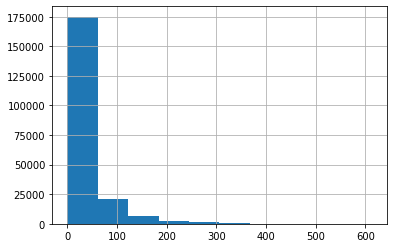

In [20]:
# sns.histplot(data=df, x="방문자수", kde=True)
df1['방문자수'].hist()

### 지역별로 살펴보기

In [29]:
df_sort = df1.groupby(['자치구','사이트명']).mean().sort_values(by='방문자수', ascending=False).reset_index()
# df_sort[:10]
df_sort

,자치구,사이트명,방문자수,위도,경도
0,서초구,4003.0,146.501389,37.500619,127.026019
1,서초구,4002.0,111.585880,37.497938,127.026814
2,강남구,4010.0,105.699537,37.501274,127.026377
3,강남구,4009.0,79.822917,37.503597,127.051592
4,광진구,4047.0,77.995602,37.544002,127.069731
5,중구,4015.0,69.411111,37.567870,127.008631
6,중구,4016.0,56.296991,37.563574,126.984504
7,강남구,4046.0,49.155324,37.525532,127.028229
8,광진구,4048.0,46.087037,37.537680,127.085212
9,서초구,4005.0,45.829630,37.485732,126.983396


/tmp/ipykernel_23876/770997585.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp, ax=ax[i])
/tmp/ipykernel_23876/770997585.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp, ax=ax[i])
/tmp/ipykernel_23876/770997585.py:5: UserWarning: 

`distplot` is a deprecated function and will b

/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jpark/miniconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jpark/miniconda3/lib/python3.8/site-packages/IP

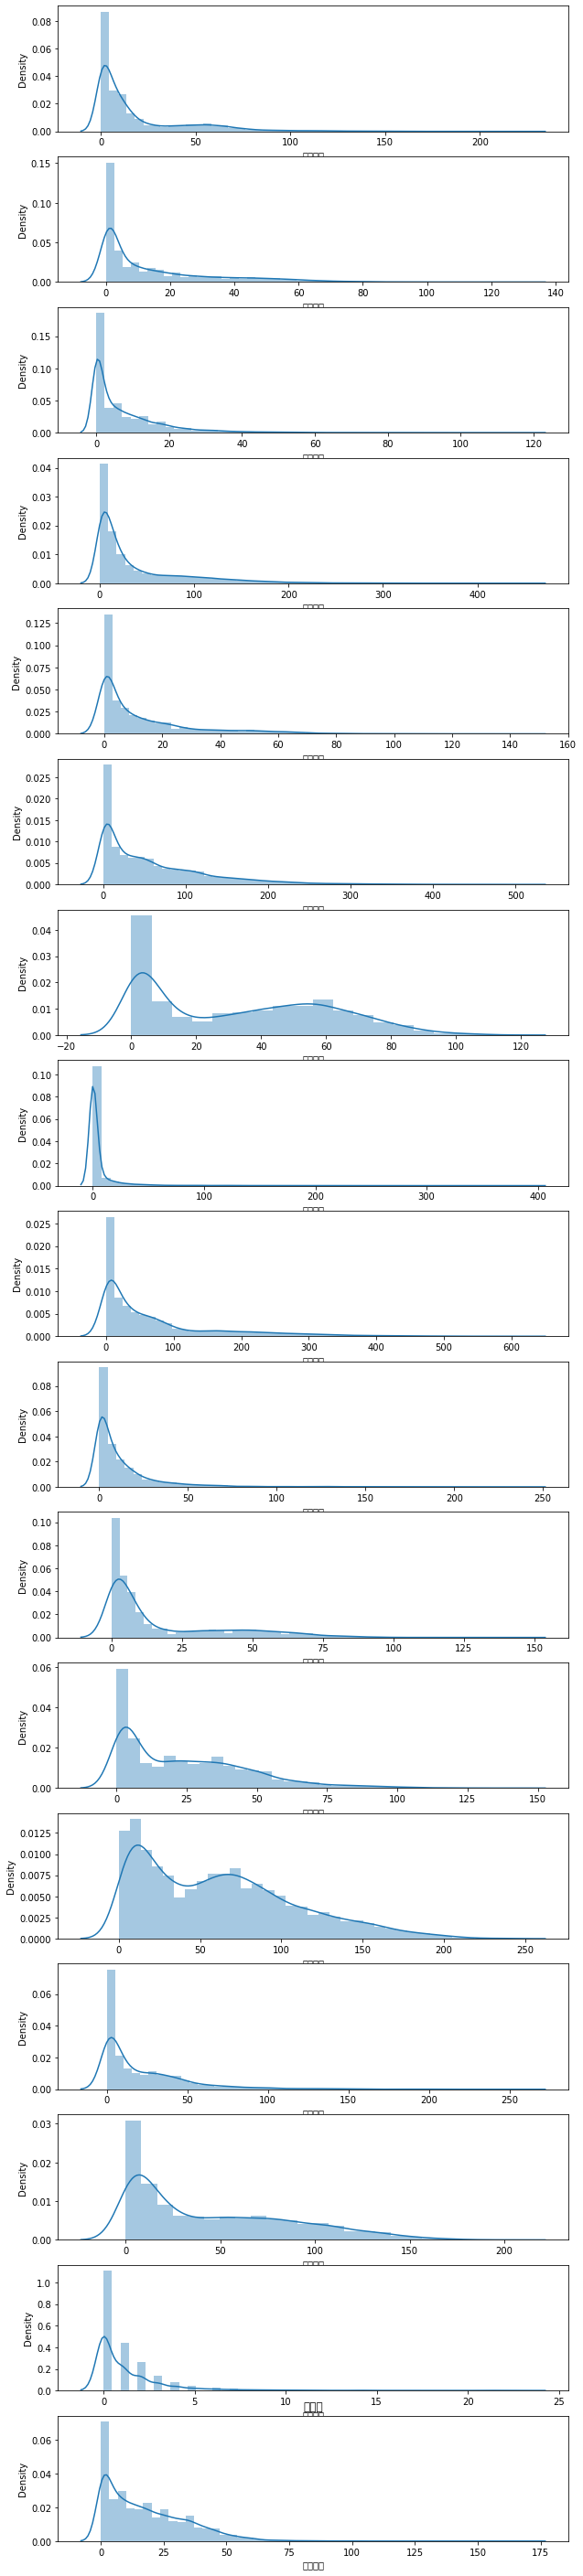

In [46]:
nrow = df1['자치구'].nunique()
fig, ax = plt.subplots(figsize=(10,nrow*3), nrows=nrow)
for i, gu in enumerate(df1['자치구'].unique()):
    temp = df1[df1['자치구']==gu]["방문자수"]
    sns.distplot(temp, ax=ax[i])
    plt.title(gu)
#     sns.distplot(df1[df1['자치구'] == "강남구"]["방문자수"], ax=ax[1])

In [50]:
nrow = df1['자치구'].nunique()
fig, ax = plt.subplots(figsize=(10,nrow*3), nrows=nrow)
for i, gu in enumerate(df1['자치구'].unique()):
    temp = df1[df1['자치구']==gu]
    sns.lineplot(x='날짜', y="방문자수", data=temp, ax=ax[i])
    plt.title(gu)
#     sns.distplot(df1[df1['자치구'] == "강남구"]["방문자수"], ax=ax[1])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff243954dc0> (for post_execute):


KeyboardInterrupt: 

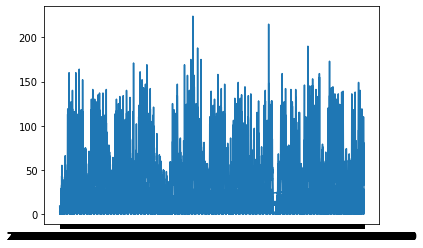

In [52]:
temp = df1[df1['자치구']==gu]
# sns.lineplot(x='날짜', y="방문자수", data=temp, ax=ax[i])
plt.plot(temp['날짜'], temp['방문자수'])